# About the Dataset

- Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
- Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

- Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

- People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

# Dataset Features
1. Age = age of the patients
2. Anaemia - Decrease of red blood cells or hemoglobin
3. Creatinine_phosphokinase - Level of the CPK enzyme in the blood (mcg/L)
4. Diabetes - If the patient has diabetes
5. Ejection_fraction - Percentage of blood leaving the heart at each contraction
6. High_blood_pressure - If the patient has hypertension
7. Platelets - Platelets in the blood (kiloplatelets/mL)
8. Serum_creatinine - Level of serum creatinine in the blood (mg/dL)
9. Serum_sodium - Level of serum sodium in the blood (mEq/L)
10. Sex - Woman or man
11. Smoking - If the patient smokes or not
12. Time - Follow-up period (days)

# Dependent Variable
### DEATH_EVENT
- If the patient deceased during the follow-up period 

# Import Packages

In [1]:
%config Completer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from scipy import stats
import random

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# EDA

EDA consists of:
- Finding Missing Values.
- Check for discrete and continuous variables for easy visualization.
- Correlation Matrix/Heatmap for finding relationship between independent variables and dependent variable.
- Also the heatmap depicts the correlation between the feature sets so that one of the correlated features can be dropped.
- Using Countplot, find the distribution of each feature individually and also wrt dependent variable.
- Find the balance in the dependent variable, so that necessary steps can be taken.
- Outliers Correction and Distribution Graph for better understanding of data with dependent variable.

In [4]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Observations
- No missing values present.
- So let's see the analysis ahead.

In [5]:
for feature in data.columns:
    print(feature, ':', len(data[feature].unique()))

age : 47
anaemia : 2
creatinine_phosphokinase : 208
diabetes : 2
ejection_fraction : 17
high_blood_pressure : 2
platelets : 176
serum_creatinine : 40
serum_sodium : 27
sex : 2
smoking : 2
time : 148
DEATH_EVENT : 2


In [6]:
discrete_features, continuous_features = [], []
for feature in data.columns:
    if feature == 'DEATH_EVENT':
        label = ['DEATH_EVENT']
    elif len(data[feature].unique()) >= 10:
        continuous_features.append(feature)
    else:
        discrete_features.append(feature)

print('Discrete: ', discrete_features, '\n', 'Continuous', continuous_features)

Discrete:  ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'] 
 Continuous ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


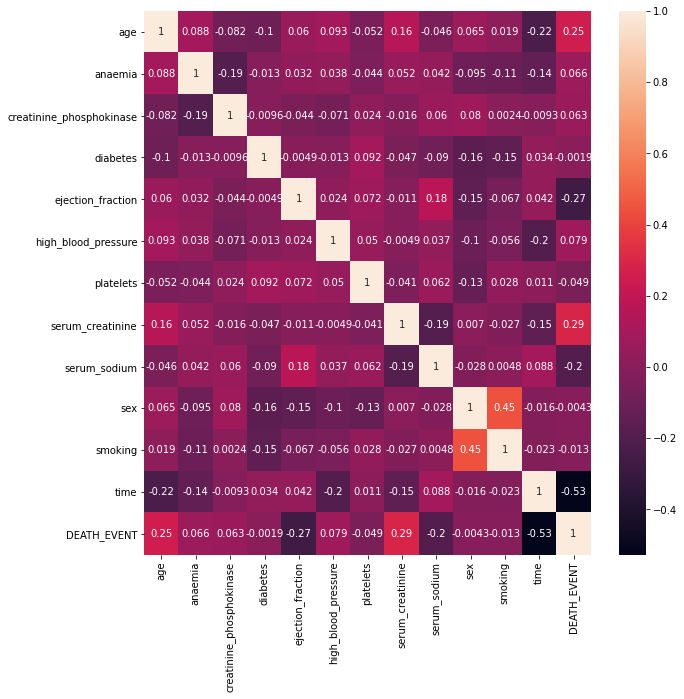

In [7]:
correlation = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True)
plt.show()

### Observations

- There is nothing to conclude from discrete features correlation matrix.
- From the correlation matrix for continuous features, time is inversely correlated to death. Thus patients with less follow up time are prone to heart failure.
- Based on EDA, features such as **anaemia, diabetes, age, sex, smoking** are less contributing.

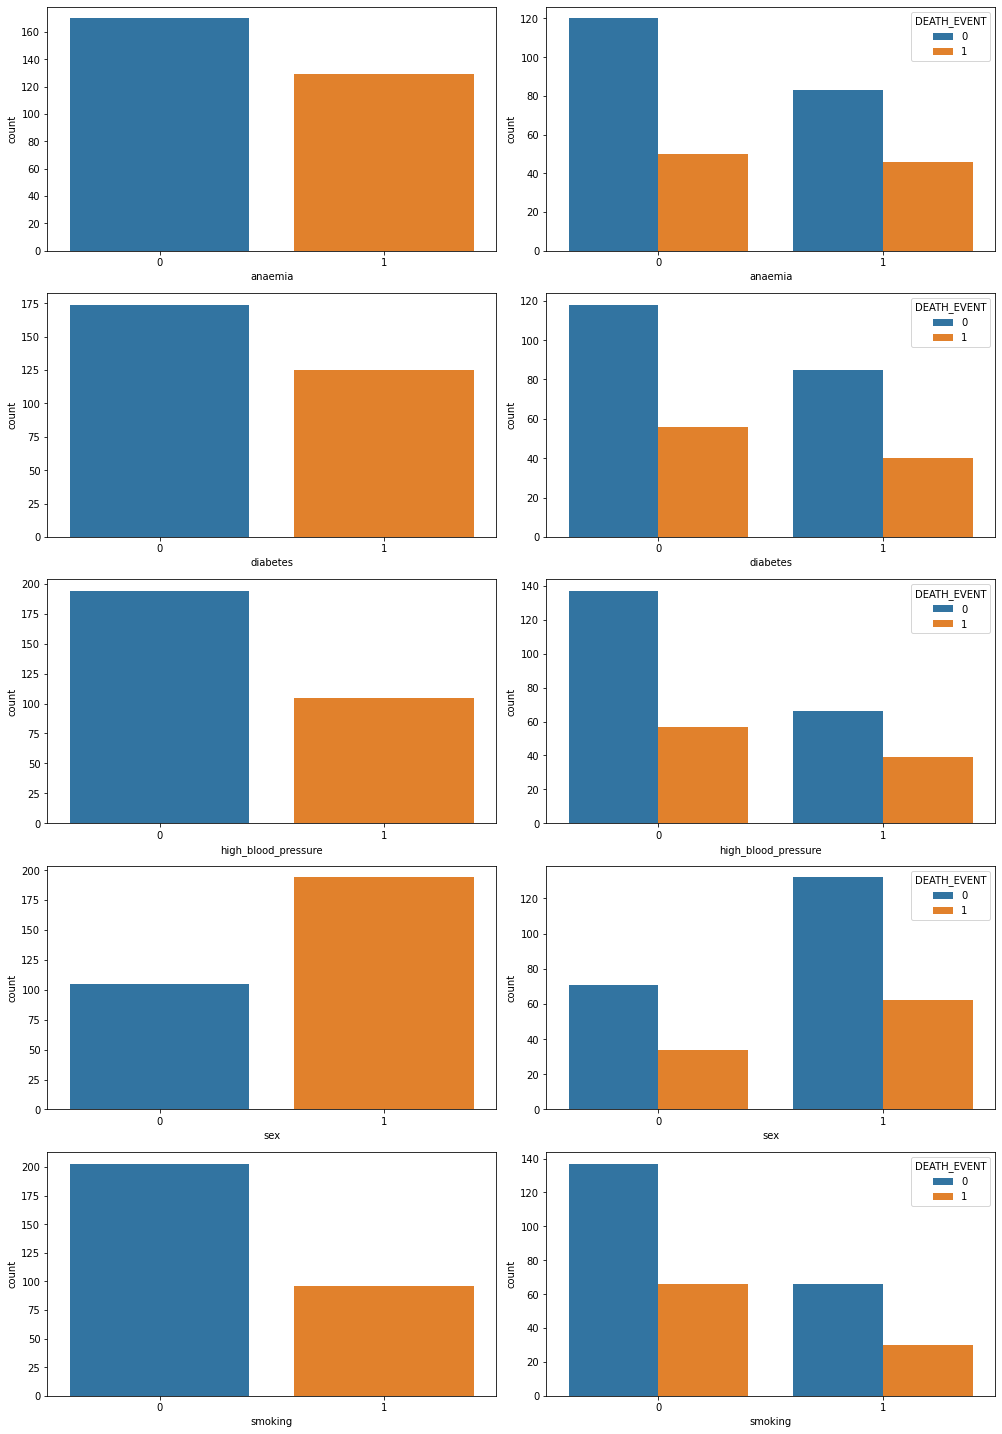

In [8]:
fig, ax = plt.subplots(len(discrete_features), 2, figsize=(14,20))

for i in range(len(discrete_features)):
    sns.countplot(ax=ax[i, 0], x=discrete_features[i], data=data)
    sns.countplot(ax=ax[i, 1], x=discrete_features[i], hue='DEATH_EVENT', data=data)
fig.tight_layout(pad=1)
plt.show()

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

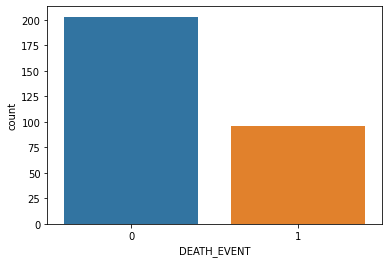

In [9]:
sns.countplot(x='DEATH_EVENT', data=data)

### Observations
- There is an imbalance with the target variable, so we can apply cross validation technique with over sampling method compared to under sampling as the data size is small.

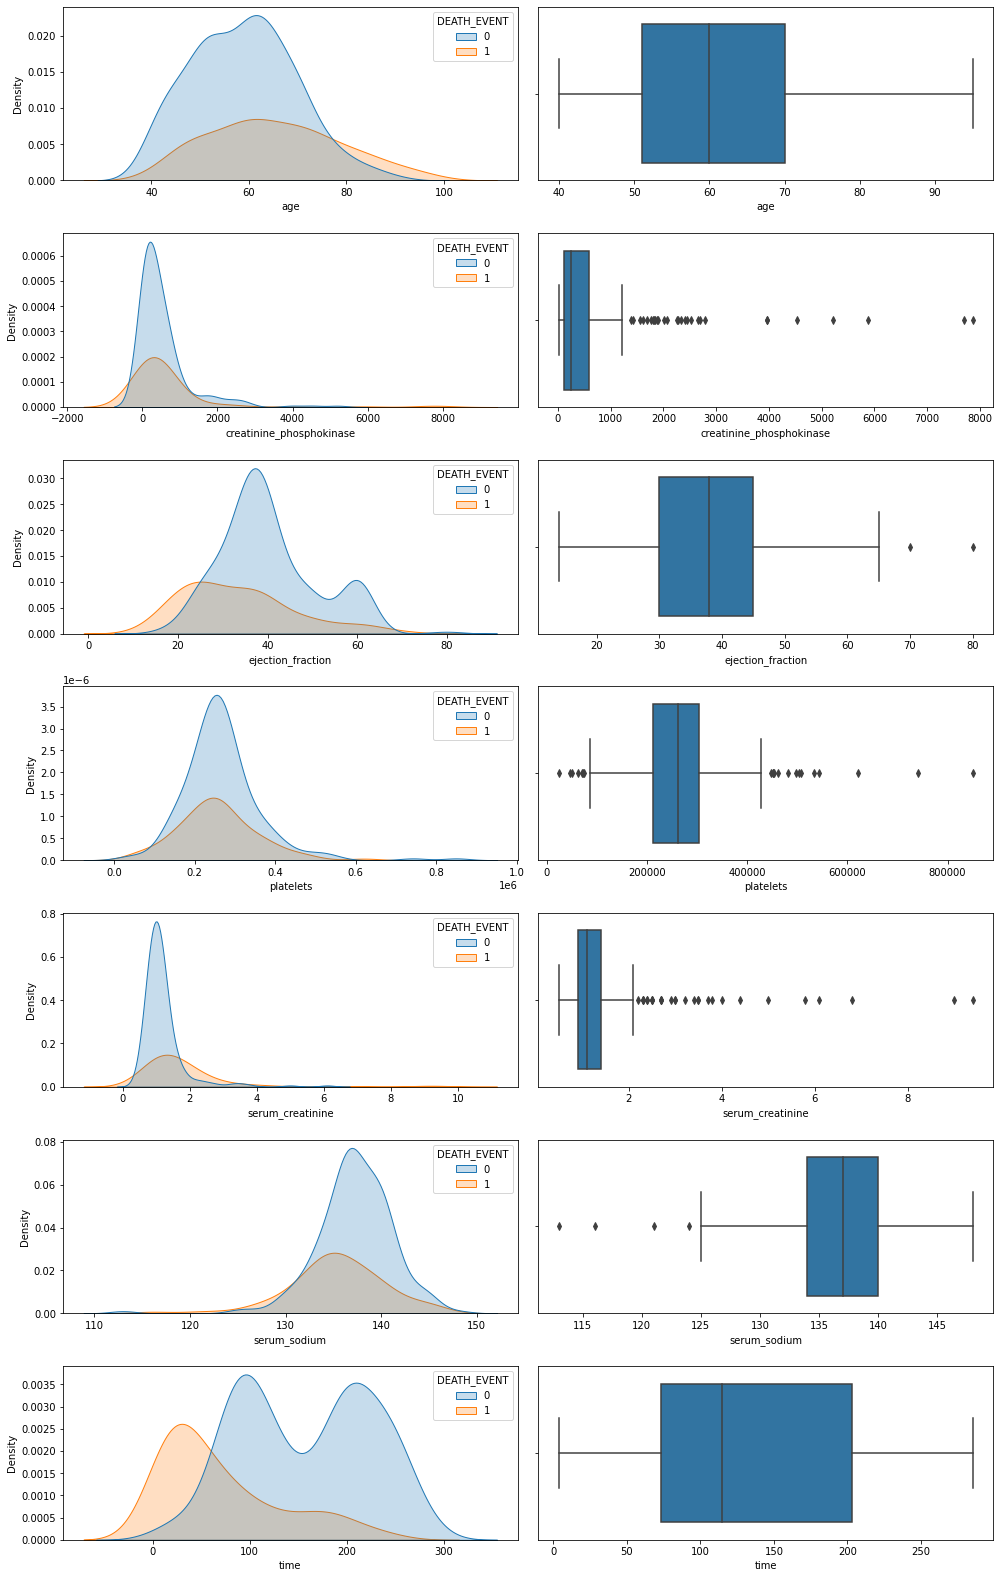

In [10]:
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(14,22))

for i in range(len(continuous_features)):
    sns.kdeplot(ax=ax[i, 0], x=continuous_features[i], hue='DEATH_EVENT', data=data, fill = True)
    sns.boxplot(ax=ax[i, 1], x=continuous_features[i], data=data)
fig.tight_layout(pad=1)
plt.show()

# Observations and Insights:
1. No missing values present in the data.
2. From the correlation matrix for continuous features, time is inversely correlated to death. Thus patients with less follow up time are prone to heart failure.
3. Smoking and Sex features are slightly correlated.
4. Based on EDA, features such as anaemia, diabetes, age, sex, smoking are less contributing.
5. There is an imbalance with the target variable, so we can apply cross validation technique with over sampling method compared to under sampling as the data size is small.
6. creatinine_phosphokinase, serum_creatinine and serum_sodium are highly skewed.
7. From KDE Plots and boxplots, we can find that there are outliers in the data.
8. creatinine_phosphokinase, serum_creatinine contains many outliers and can be treated using IQR Formula.

# Hypothesis Testing

## Hypothesis 1

**Hypothesis 1 (H01):** There is a relationship between the means of smoking and sex of patient as it is a observation of EDA.

**Alternate Hypothesis (Ha1)** There is no relation between smoking and sex.

In [11]:
t_score, p_val = stats.ttest_ind(data['smoking'][:25], data['sex'][:25])
print(t_score, p_val)

-3.02659963383191 0.0039688385834074245


In [12]:
dof = 25 + 25 - 2 # degree of freedom
t_dist = stats.t(dof)
print(2 * t_dist.cdf(t_score))

0.0039688385834074245


In [13]:
if p_val < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


**Result:** As p-value is less than 0.05, null hypothesis 1 is rejected.

## Hypothesis 2

**Hypothesis 2 (H02):** The selected samples of age from the dataset, the mean of sample set is nearly equal to complete data.

**Alternate Hypothesis (Ha2)** The mean of sample set is not equal to and vary a lot from that of complete data.

In [14]:
sample_age_set = np.random.choice(list(data['age']), 20)

_, p_val = stats.ttest_1samp(sample_age_set, data['age'].mean())
print(p_val)

0.6634219582214849


In [15]:
if p_val < 0.05:
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


**Result:** As p-value is greater than 0.05, null hypothesis 2 is accepted.

In [16]:
print('Mean of complete data: ', np.mean(data['age']))
print('Mean of sample data: ', np.mean(sample_age_set))

Mean of complete data:  60.83389297658862
Mean of sample data:  59.733349999999994


**Discuss the Results:**

As we can see the difference between the mean values is less thus the mean of random sample considered from the data (60) is near to that of complete data (61).

## Hypothesis 3

**Hypothesis 3 (H03):** There is a some connection between high BP and risk of heart failure as high BP stress on the heart functioning thus might affecting the patients predictions.

**Alternate Hypothesis (Ha3)** There is no relation between high BP and heart failure.

In [17]:
_, p_val = stats.ttest_ind(data['high_blood_pressure'], data['DEATH_EVENT'])
print(p_val)

0.43675818272737343


In [18]:
if p_val < 0.05:
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


**Result:** As p-value is greater than 0.05, null hypothesis 3 is accepted.

# Future Scope
- Will try out different classifiers and selecting one with highest recall score.
- Recall represents the False Negative values which is very crucial in medical diagnosis.
- As the dataset is imbalanced, need to tackle the major issue.
- Alongwith that data rows are less, so will opt for oversampling or SMOTE or weighted class method.
- Feature selection is also crucial as some features are proven to be more prominent based on EDA, thus contributing more rather than selecting and processing all.